In [8]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

# load the data
df = pd.read_csv("../datasets/Task_2/3.csv")

<Axes: >

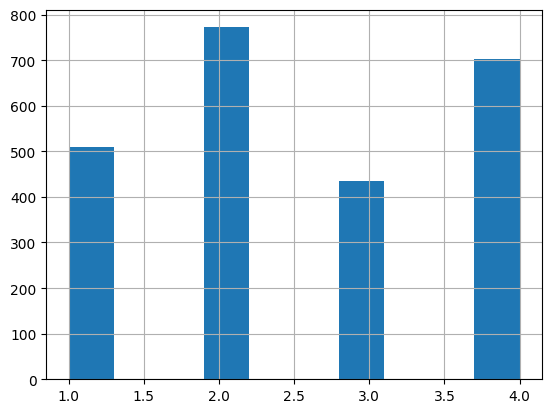

In [9]:
df['Segmentation'].hist()

In [10]:
df.isna().sum()

Unnamed: 0                  0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Segmentation                0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Profession_nan              0
dtype: int64

In [11]:
int(df.duplicated().sum())

0

In [12]:
X = df.drop("Segmentation", axis=1)
y = df["Segmentation"]
# step 1, split the data into 70% (training data) and 30% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# step 2, split the temporary data in HALF (0.5) => 15% test and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [13]:
# create neural network

# save the amount of support variables into a helper variable
# so we don't have to update the input_shape all the time
variable_amount = len(X.columns)

# Define Sequential neural network model
# input shape has to match the amount of SUPPORT VARIABLES
# in other words => amount of columns in X 

# Tip: have at least the same number of nodes as in the input shape

# since we have 13 support variables this time => 16 nodes in first layer

# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-10 22:30:24.420201: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val))

Epoch 1/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200.1814 - val_loss: 3.2454
Epoch 2/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8690 - val_loss: 2.7012
Epoch 3/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5898 - val_loss: 2.5879
Epoch 4/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4256 - val_loss: 2.4372
Epoch 5/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0976 - val_loss: 1.9532
Epoch 6/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1327 - val_loss: 1.9458
Epoch 7/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8542 - val_loss: 1.7176
Epoch 8/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7531 - val_loss: 2.5202
Epoch 9/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8825 - val_loss: 2.1254
Epoch 10/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6956 - val_loss: 1.7802
Epoch 11/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6579 - val_loss: 1.7255
Epoch 12/800
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1

<Axes: >

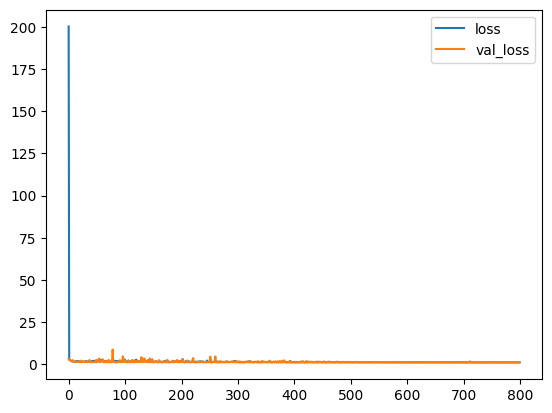

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [16]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1.2763103246688843

Train data evaluation:
1.1380257606506348


In [17]:
# get test predictions
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test True Y,Model Predictions
0,3,2.408133
1,4,3.113621
2,2,2.683156
3,4,2.549441
4,1,1.938996
...,...,...
358,1,2.443894
359,4,2.451480
360,4,2.479814
361,1,2.809558


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

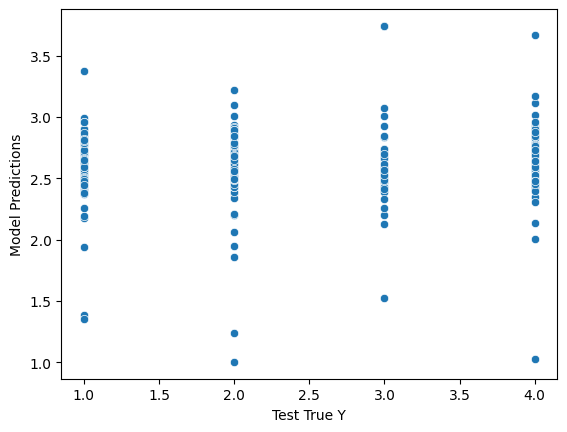

In [18]:
# these values follow a linear diagonal line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [19]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
1.01 $

MSE
1.28 $^2

RMSE:
1.13 $

R-squared:
-0.01

Explained variance score:
-0.01


/tmp/ipykernel_127143/3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


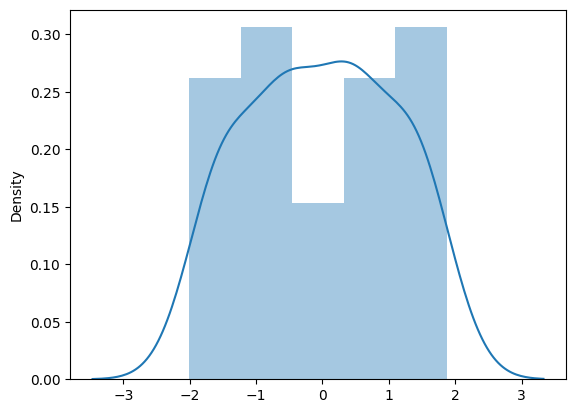

In [20]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()